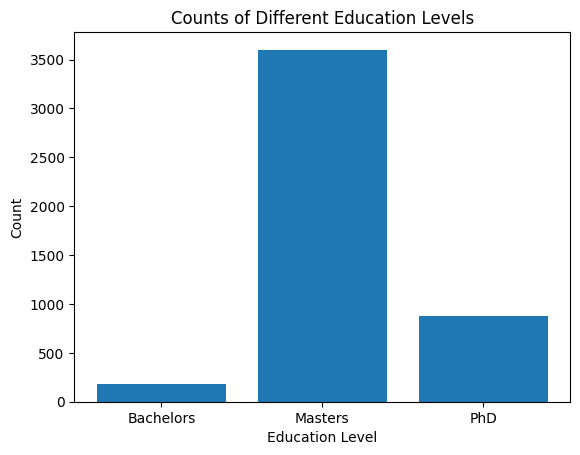

1889
      Education  JoiningYear  PaymentTier  Age  ExperienceInCurrentDomain  \
0           0.0         2017            3   34                          0   
1           0.0         2013            1   28                          3   
2           0.0         2014            3   38                          2   
3           1.0         2016            3   27                          5   
4           1.0         2017            3   24                          2   
...         ...          ...          ...  ...                        ...   
4645        1.0         2017            2   31                          2   
4647        0.0         2016            3   30                          2   
4649        1.0         2013            2   37                          2   
4650        1.0         2018            3   27                          5   
4651        0.0         2012            3   30                          2   

      LeaveOrNot  City_New Delhi  City_Pune  Gender_Male  EverBenched_

In [40]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sea
from scipy import stats
import numpy as np
# Load the dataset
file = pd.read_csv('want.csv')

# To find repeated things


# DEFINE EDUCATION ORDER ON REPEATED VALUES
education_order = ['Bachelors', 'Masters', 'PhD']  

# Initialize the OrdinalEncoder 
ordinal_encoder = OrdinalEncoder(categories=[education_order], handle_unknown='use_encoded_value', unknown_value=-1)

# Apply the encodingi(On education column)
file['Education'] = ordinal_encoder.fit_transform(file[['Education']])

# One-Hot Encoding for 'City', 'Gender', and 'EverBenched'(As they have no order )
file = pd.get_dummies(file, columns=['City', 'Gender', 'EverBenched'], drop_first=True)



education_counts = file['Education'].value_counts().sort_index()#locked the Education coulumn first counted the values and then sorted them
plt.bar(education_counts.index, education_counts.values) # Then we made a bar chart on it
plt.xlabel('Education Level')#X axis is Edication Level
plt.ylabel('Count')#Y axis is Count
plt.title('Counts of Different Education Levels')#Basic main title
plt.xticks(ticks=education_counts.index, labels=education_order)  # Optional: Use original labels
plt.show()
file=file.dropna()
# Check for duplicate rows
print(file.duplicated().sum())

# Remove duplicate rows 
file = file.drop_duplicates()

z_scores = stats.zscore(file.select_dtypes(include=['float64', 'int64']))#zscore

# Filter out rows with Z-scores greater than a threshold (e.g., 3) beacuse 99.7%  times lies in +-3
abs_z_scores = np.abs(z_scores)
file = file[(abs_z_scores < 3).all(axis=1)]

print(file)
print(file.dtypes)#to check types
